**Officeworks, is a leading retail store in Australia, with numerous outlets around the country, the manager would like to improve their customer experience by providing them online predictive prices about their gadgets/ Laptops if they wants to sell them. To improve this experience the manager would like us to build a model which is sustainable and accurate enough, to get the objective achieved. Apply Lasso Ridge Regression model on the dataset and predict Price, given other attributes and tabulate R squared ,RMSE and correlation values.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
computer = pd.read_csv(r"C:\Users\D\Desktop\New Assignments  Keys\Datasets\Computer_Data (1).csv")
computer.info()
computer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6259 non-null   int64 
 1   price       6259 non-null   int64 
 2   speed       6259 non-null   int64 
 3   hd          6259 non-null   int64 
 4   ram         6259 non-null   int64 
 5   screen      6259 non-null   int64 
 6   cd          6259 non-null   object
 7   multi       6259 non-null   object
 8   premium     6259 non-null   object
 9   ads         6259 non-null   int64 
 10  trend       6259 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 538.0+ KB


,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [3]:
# 1st column is useless
# we drop it
computer = computer.drop('Unnamed: 0', axis = 1)
# Check for missing Values
computer.isna().sum()
# No missing values

price      0
speed      0
hd         0
ram        0
screen     0
cd         0
multi      0
premium    0
ads        0
trend      0
dtype: int64

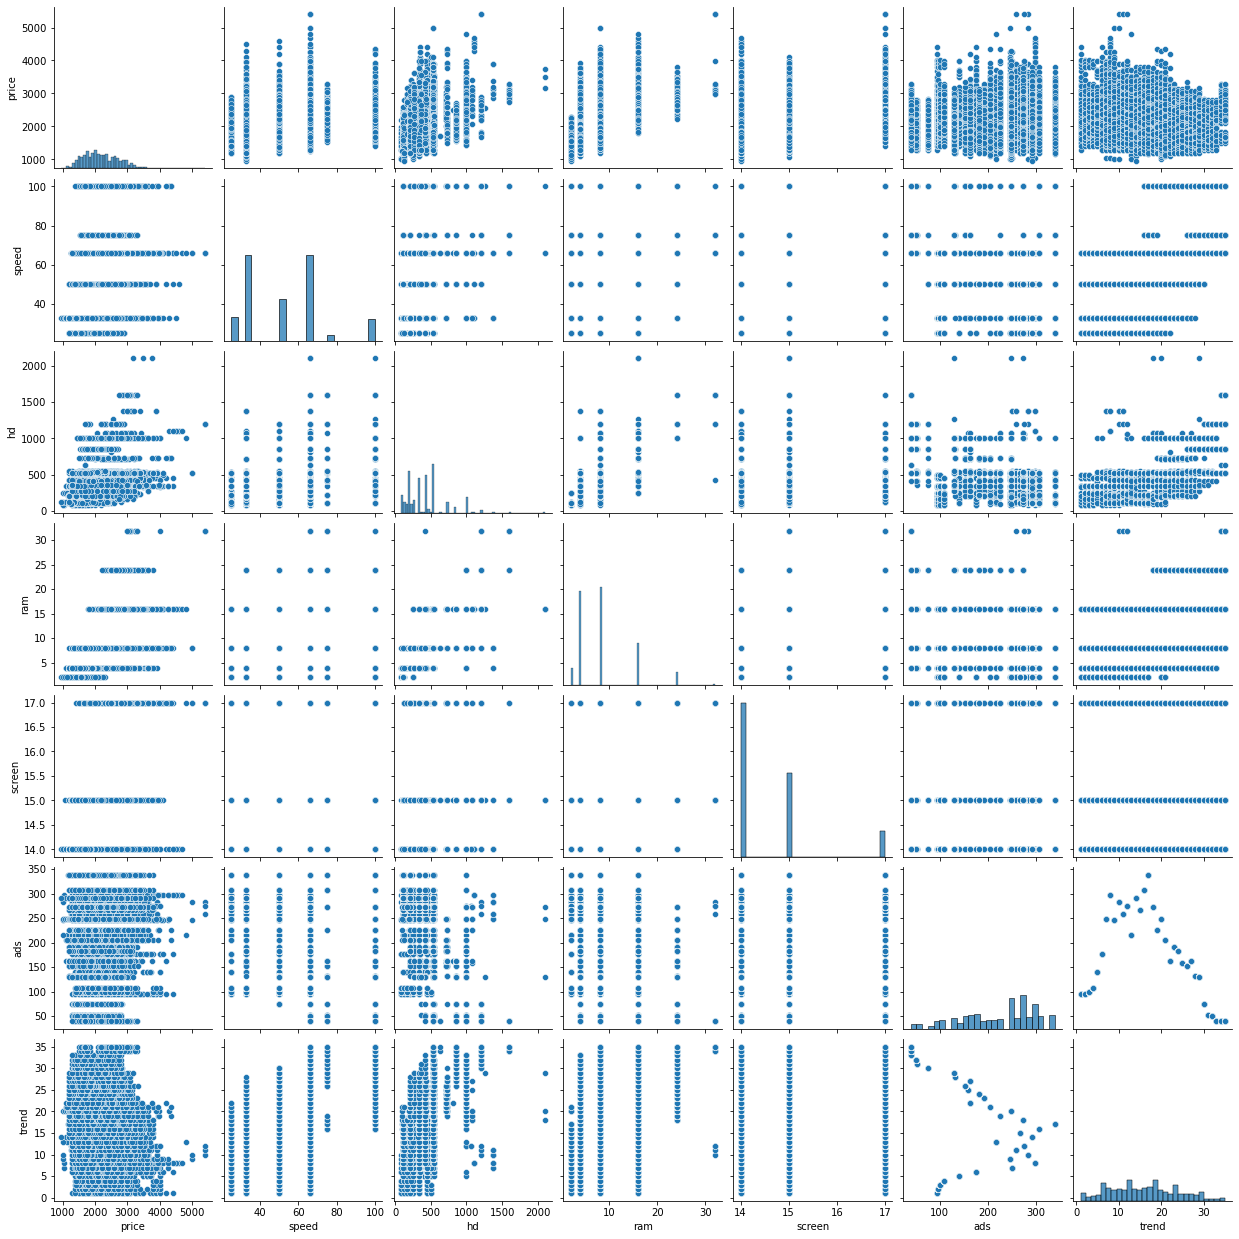

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


In [4]:
# correlation and distributions
sns.pairplot(computer);plt.show()
computer.corr()
# moderate correlation with Ram, low with others

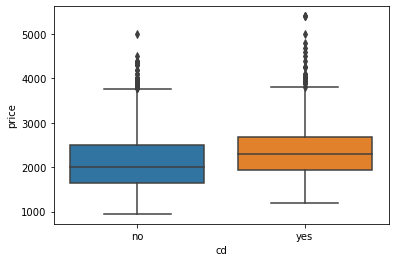

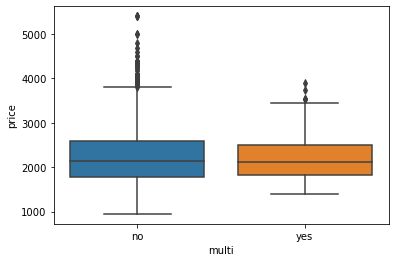

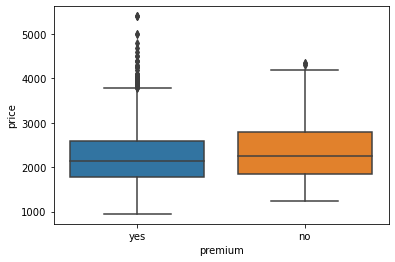

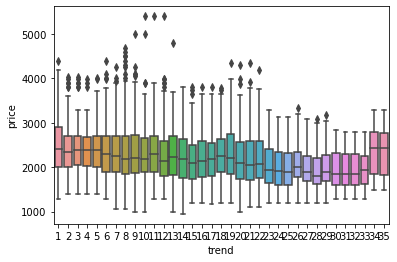

In [5]:
# checking categorical columns
sns.boxplot(x = 'cd', y = 'price', data = computer);plt.show()
sns.boxplot(x = 'multi', y = 'price', data = computer);plt.show()
sns.boxplot(x = 'premium', y = 'price', data = computer);plt.show()
sns.boxplot(x = 'trend', y = 'price', data = computer);plt.show()
# there doesnot seem to be any difference between the various boxplots of different classes for each of the categorical columns wrt Price
# this shows that they dont have much predictive power
# Elastic-net regression will confirm this later

In [6]:
# making dummies
dummies = pd.get_dummies(data=computer, columns = ['cd','multi','premium'], drop_first = True)
                                                  
X = dummies.drop('price', axis = 1) 
y = dummies['price']

In [7]:
# splitting data between train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [8]:
# building base model first
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import r2_score, mean_squared_error

print('Test RMSE',np.sqrt(mean_squared_error(y_test,test_pred)))
# RMSE of 278.62452148549914 on test dataset
print('Test R-Squared',r2_score(y_test,test_pred))
# R square of 76.03% on test dataset

print('Train RMSE',np.sqrt(mean_squared_error(y_train,train_pred)))
# RMSE of 274.27721548684735 on train dataset
print('Train R-Squared',r2_score(y_train,train_pred))
# R square of 77.9% on test dataset

Test RMSE 278.62452148549914
Test R-Squared 0.7603807915831051
Train RMSE 274.27721548684735
Train R-Squared 0.7790003145426938


In [10]:
#### Now we will use Elastic Net as it combines the penalties of ridge regression and lasso regreesion

from sklearn.linear_model import ElasticNetCV

elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

elastic_model.fit(X_train,y_train)

elastic_model.l1_ratio_
# elastic model selected the l1 ratio as 1 which means 100% lasso, which means ridge is not preferred for this case
# as some variables could be totally useless

1.0

In [11]:
test_predictions_en = elastic_model.predict(X_test)
train_predictions_en = elastic_model.predict(X_train)


print('Test RMSE',np.sqrt(mean_squared_error(y_test,test_predictions_en)))
# RMSE of 324.20856293361504 on test dataset
print('Test R-squared',r2_score(y_test,test_predictions_en))
# R square of 67.5% on test dataset

print('Train RMSE',np.sqrt(mean_squared_error(y_train,train_predictions_en)))
# RMSE of 320.366 on train dataset
print('Train R-squared',r2_score(y_train,train_predictions_en))
# R square of 69.8% on train dataset

Test RMSE 324.20856293361504
Test R-squared 0.6755618470828688
Train RMSE 320.3662007514793
Train R-squared 0.6984873249154078


###### we see that R squared has decreased by alomost 10% wrt the base model 
###### since l1_ratio was1 , 100% lasso was used and features were eliminated

In [12]:
print(list(zip(elastic_model.coef_, X_train.columns)))
# cd, multi and premium columns were eliminated as they have 0 coefficients

[(9.032633479435592, 'speed'), (0.7932671799765061, 'hd'), (44.62713336028478, 'ram'), (39.69485089725755, 'screen'), (1.0223480717993683, 'ads'), (-45.30143023132225, 'trend'), (0.0, 'cd_yes'), (0.0, 'multi_yes'), (-0.0, 'premium_yes')]


In [13]:
# let us try Ridge regression

from sklearn.linear_model import RidgeCV

ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 5.0, 10.0),scoring='neg_mean_absolute_error')

ridge_cv_model.fit(X_train,y_train)
ridge_cv_model.alpha_
# alpha of 10 was chosen

10.0

In [14]:
test_predictions_ridge = ridge_cv_model.predict(X_test)
train_predictions_ridge = ridge_cv_model.predict(X_train)

print('Test RMSE',np.sqrt(mean_squared_error(y_test,test_predictions_ridge)))
# RMSE of 278.62 on test dataset
print('Test R-squared',r2_score(y_test,test_predictions_ridge))
# R square of 76% on test dataset

print('Train RMSE',np.sqrt(mean_squared_error(y_train,train_predictions_ridge)))
# RMSE of 274 on train dataset
print('Train R-squared',r2_score(y_train,train_predictions_ridge))
# R square of 77.8% on test dataset

Test RMSE 278.6240852583719
Test R-squared 0.7603815418998148
Train RMSE 274.3018203354879
Train R-squared 0.778960661903655


##### Ridge regression gives same results as the base model
##### however  since it never removes features no feature will have a coef of 0

In [15]:
# The coefficients are
print(list(zip(ridge_cv_model.coef_, X_train.columns)))

[(9.336100971972883, 'speed'), (0.7761655829963274, 'hd'), (48.67751169489566, 'ram'), (122.51804970843887, 'screen'), (0.6962290828450932, 'ads'), (-51.71051738009032, 'trend'), (53.95092641620005, 'cd_yes'), (107.23144347636755, 'multi_yes'), (-497.37202948972265, 'premium_yes')]


###### As we can see no feature has 0 coef.
###### All 3 models were right fits, but elastic net model(100% lasso - as 11_ratio was 1) was performing poorly

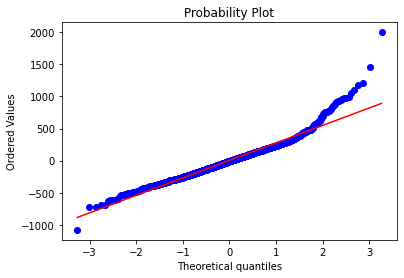

In [16]:
from scipy import stats
# Q-Q plot of errors
res = y_test - test_predictions_ridge
stats.probplot(res, dist = "norm", plot = plt)
plt.show()

Errors seem to be normally distributed expcept on the far right - model is ok